In [235]:
# for data manipulation
import pandas as pd
import numpy as np
import math

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for regression 
import statsmodels.api as sm

# for preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

from datetime import datetime
from dateutil import parser
import tldextract
import re

In [236]:
#load dataset
df = pd.read_csv('C:\\Users\\alexr\\Desktop\\   \\Work\\Data Science\\In Use\\test\\test.csv',on_bad_lines='skip')

C:\Users\alexr\AppData\Local\Temp\ipykernel_58092\2150769945.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\alexr\\Desktop\\   \\Work\\Data Science\\In Use\\test\\test.csv',on_bad_lines='skip')


In [300]:
pd.set_option('display.max_columns', None)
df.head(1000)

,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,player_name,has_ad,os_version,app_name,is_premium,play_duration,content_type,title,website_name
0,False,embed,web-mobile,2020-02-02T10:21:20.000Z,2020-02-02T10:21:20.000Z,https://m.liputan6.com/bola/read/4169085/marc-...,300000.0,200-500,0,0.000,liputan6,videojs,True,9,vidio,False,0,vod,Kiprah Eks Pemain Juventus yang Dikaitkan deng...,liputan6.com
1,False,embed,web-mobile,2020-02-02T12:17:33.000Z,2020-02-02T12:17:53.000Z,https://m.bola.net/italia/lautaro-martinez-abs...,600.0,0-200,750,0.000,bolanet,videojs,True,9,vidio,False,19,vod,"Pindah ke Inter Milan, Christian Eriksen Jadi ...",bola.net
2,False,embed,web-mobile,2020-02-02T01:26:42.000Z,2020-02-02T01:27:07.000Z,https://m.bola.net/italia/lautaro-martinez-abs...,300000.0,200-500,900000,0.000,bolanet,videojs,True,9,vidio,False,24,vod,"Pindah ke Inter Milan, Christian Eriksen Jadi ...",bola.net
3,False,embed,web-mobile,2020-02-02T13:45:05.000Z,2020-02-02T13:45:05.000Z,https://m.liputan6.com/amp/4169313/jadwal-liga...,600.0,0-200,750,0.000,liputan6,videojs,True,8.1.0,vidio,False,0,vod,5 Kelebihan Mikel Arteta Menurut Pep Guardiola,liputan6.com
4,False,embed,web-desktop,2020-02-02T13:23:40.000Z,2020-02-02T13:23:44.000Z,https://www.liputan6.com/bola/read/4169313/jad...,700.0,0-200,875,27.101,liputan6,videojs,True,7,vidio,False,4,vod,5 Kelebihan Mikel Arteta Menurut Pep Guardiola,liputan6.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,direct,app-android,2020-02-03T04:06:45.000Z,2020-02-03T04:55:46.000Z,movie profile,300000.0,200-500,137812500,45.121,others,KmkExoVideoView,True,24,vidio,False,3675,vod,Samudra Cinta - Episode 118 dan 119 Part 2/2,movie profile.
996,False,embed,web-mobile,2020-02-03T09:10:46.000Z,2020-02-03T09:11:12.000Z,https://m.liputan6.com/global/read/4113777/sul...,400.0,0-200,500,2.966,liputan6,videojs,True,5.1.1,vidio,False,27,vod,Begini Cara Cepat Kupas Kulit Bawang Putih,liputan6.com
997,False,direct,web-mobile,2020-02-03T14:30:41.000Z,2020-02-03T16:21:15.000Z,https://m.vidio.com/watch/1889019-samudra-cint...,567.0,0-200,2125,6.361,internal,videojs,True,7.0,vidio,False,3606,vod,Samudra Cinta - Episode 19 dan 20,vidio.com
998,True,direct,app-android,2020-02-03T14:51:40.000Z,2020-02-03T15:05:36.000Z,movie profile,300000.0,200-500,50475000,30.607,others,KmkExoVideoView,True,23,vidio,False,1346,vod,Cinta Dua Hati - Episode 02,movie profile.


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106811 entries, 0 to 106810
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   is_login           106811 non-null  bool   
 1   playback_location  106811 non-null  object 
 2   platform           106811 non-null  object 
 3   play_time          106811 non-null  object 
 4   end_time           106811 non-null  object 
 5   referrer           101050 non-null  object 
 6   average_bitrate    101865 non-null  float64
 7   bitrate_range      106811 non-null  object 
 8   total_bytes        106811 non-null  int64  
 9   buffer_duration    106811 non-null  float64
 10  referrer_group     106811 non-null  object 
 11  player_name        103544 non-null  object 
 12  has_ad             106811 non-null  bool   
 13  os_version         106406 non-null  object 
 14  app_name           106811 non-null  object 
 15  is_premium         106811 non-null  bool   
 16  pl

In [306]:
cat = [feature for feature in df.columns if len(df[feature].unique())<25]

#cat_df = pd.DataFrame(cat)

cat_df = df[cat]

In [307]:
for feature in cat:
    print('{} = {} cat'.format(feature,len(df[feature].unique())))

is_login = 2 cat
playback_location = 2 cat
platform = 7 cat
bitrate_range = 3 cat
referrer_group = 16 cat
player_name = 4 cat
has_ad = 2 cat
app_name = 3 cat
is_premium = 2 cat
content_type = 3 cat


In [308]:
#check categorical value
for i in cat_df.columns:
    print(i.upper(),":",cat_df[i].unique())

IS_LOGIN : [False  True]
PLAYBACK_LOCATION : ['embed' 'direct']
PLATFORM : ['web-mobile' 'web-desktop' 'app-android' 'tv-android' 'tv-tizen'
 'app-ios' 'tv-webos']
BITRATE_RANGE : ['200-500' '0-200' 'unknown']
REFERRER_GROUP : ['liputan6' 'bolanet' 'others' 'kapanlagi' 'dream' 'internal' 'empty'
 'bola' 'otosia' 'merdeka' 'google' 'facebook' 'fimela' 'emtek'
 'telkomsel' 'twitter']
PLAYER_NAME : ['videojs' 'KmkExoVideoView' nan 'kmkexoplayer']
HAS_AD : [ True False]
APP_NAME : ['vidio' 'liputan6' 'bola']
IS_PREMIUM : [False  True]
CONTENT_TYPE : ['vod' 'livestreaming' 'catchup']


In [242]:
#Missing values
# Calculate the percentage of missing values in each column
a = df.isnull().sum().sort_values(ascending=False) * 100 / len(df)

# Iterate over each column and its corresponding missing value percentage
for col, percentage in a.items():

    # Print the column name and its missing value percentage with 2 decimal places
    # '<30' in the f-string format specifies left alignment with a field width of 30 characters for the column names.
    print(f'{col:<30} {percentage:.2f}%')

city                           100.00%
utm_campaign                   99.96%
utm_medium                     99.92%
utm_source                     99.92%
genre_name                     95.11%
film_title                     94.55%
season_name                    94.55%
hash_film_id                   94.55%
app_version                    67.53%
stream_type                    63.55%
autoplay                       36.48%
category_name                  36.45%
completed                      36.45%
browser_version                33.74%
flash_version                  32.63%
os_name                        31.57%
browser_name                   31.52%
referrer                       5.39%
average_bitrate                4.63%
player_name                    3.06%
os_version                     0.38%
hash_watcher_id                0.00%
hash_visit_id                  0.00%
hash_play_id                   0.00%
hash_content_id                0.00%
platform                       0.00%
playback_location   

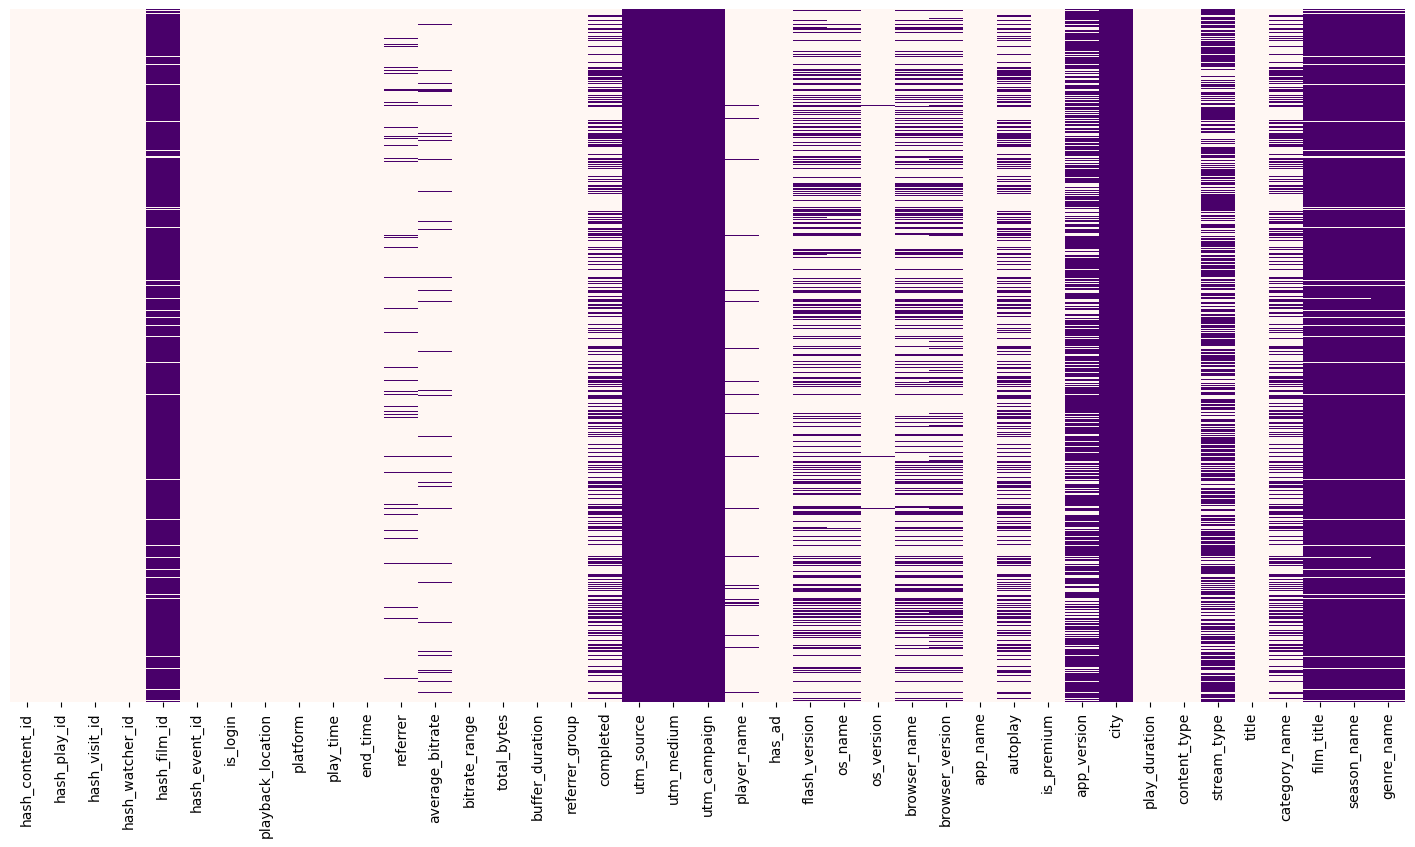

In [243]:
#Heatmap for missing values
# Visualize the missing values
plt.figure(figsize=(18, 9))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='RdPu')
plt.show()

In [244]:
# drop id and empty column or column with more than 5% missing data
df.drop(['hash_content_id', 'hash_play_id', 'hash_visit_id','hash_watcher_id', 'hash_film_id','hash_event_id','utm_source', 
         'utm_medium','utm_campaign','city','film_title','season_name','genre_name','app_version','stream_type','autoplay',
         'category_name','completed','browser_version','flash_version','os_name','browser_name'], axis=1, inplace=True)

# drop play and end time due to play_duration
#df.drop(['play_time', 'end_time'], axis=1, inplace=True)

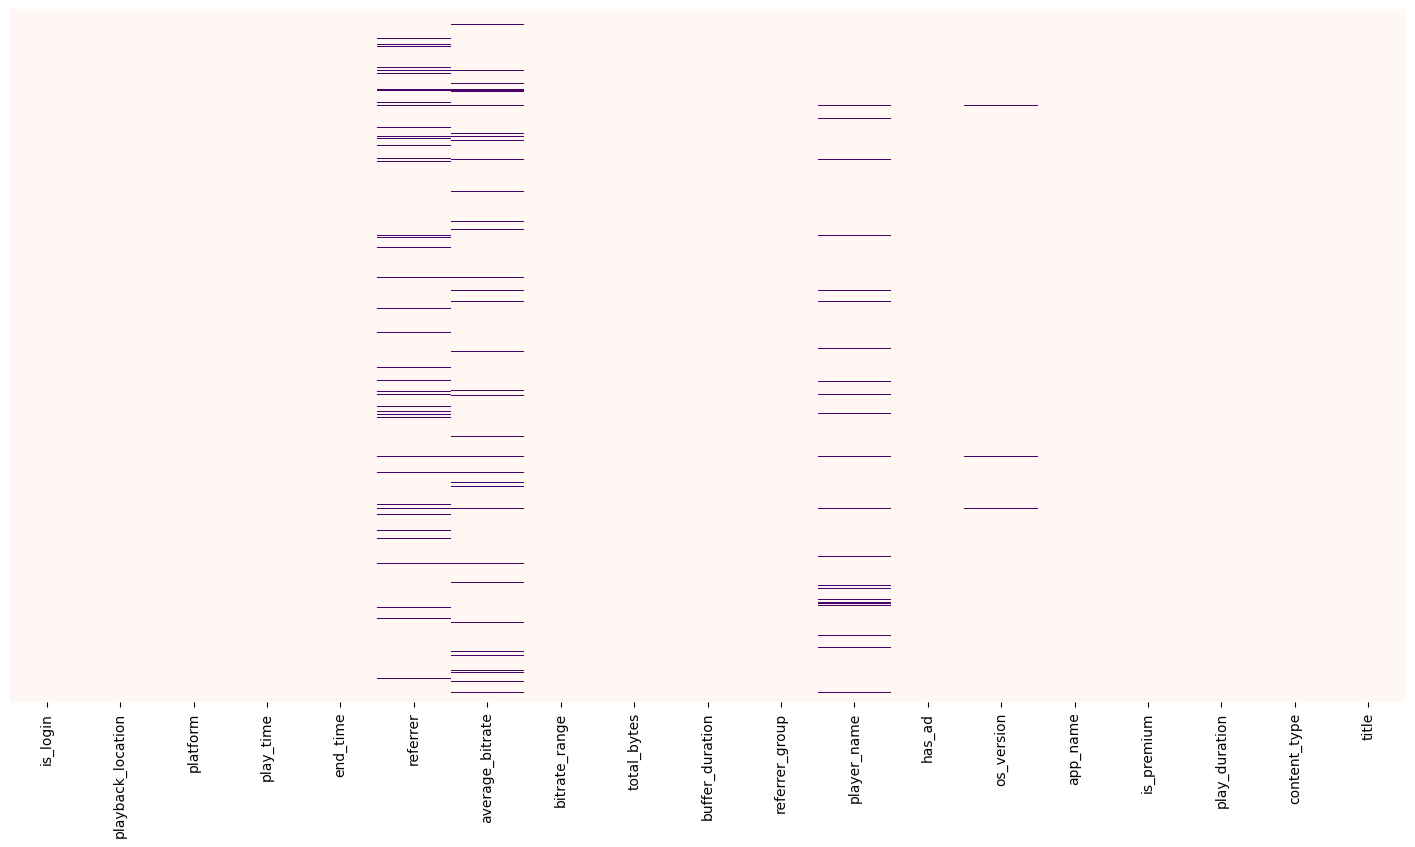

In [245]:
#Heatmap for missing values
# Visualize the missing values
plt.figure(figsize=(18, 9))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='RdPu')
plt.show()

In [246]:
#duration by play time and end time
#df[['play_time', 'end_time']] = df[['play_time', 'end_time']].apply(pd.to_datetime)
#df['duration'] = df['end_time'] - df['play_time']

In [247]:
revised_df = df['referrer']

In [248]:
revised_df['referrer'] = df['referrer'].fillna('none')

C:\Users\alexr\AppData\Local\Temp\ipykernel_58092\37890873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revised_df['referrer'] = df['referrer'].fillna('none')


In [249]:
def extract_website_name(referrer):
    ext = tldextract.extract(referrer)
    #Combine domain and suffix to get the full website name
    return f"{ext.domain}.{ext.suffix}"

# Apply the function to the DataFrame
df['website_name'] = revised_df['referrer'].apply(extract_website_name)

In [250]:
df.describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[5])\
        .background_gradient(subset=['std'], cmap='Blues')\
        .background_gradient(subset=['75%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
average_bitrate,101865.000000,199406.240230,141397.648431,144.000000,633.000000,300000.000000,300000.000000,300000.000000
total_bytes,106811.000000,77653417.448465,468361203.774299,0.000000,750.000000,506250.000000,11250000.000000,30920625000.000000
buffer_duration,106811.000000,227242.178958,74163471.625123,0.000000,0.000000,1.000000,6.000000,24238070461.000000
play_duration,106811.000000,425.431847,1541.638614,0.000000,4.000000,41.000000,120.000000,82455.000000


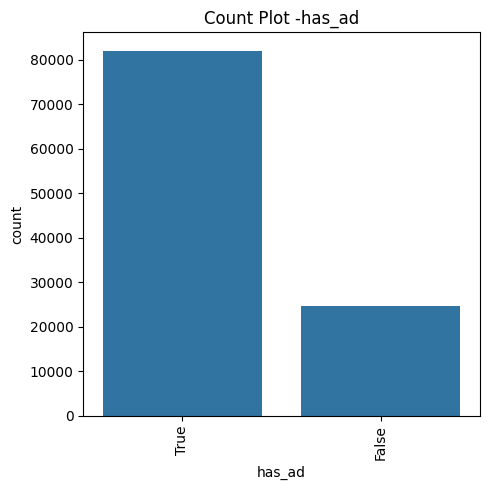

In [270]:
v1 = 'has_ad'

plt.figure(figsize = (5,5))

#Box plot
plt.subplot(1, 1, 1)
sns.countplot(x=v1, data=df,order = df[v1].value_counts().index)
plt.title(f'Count Plot -{v1}')
plt.xticks(rotation = 90)

#adjust layout
plt.tight_layout()

#Show the plots
plt.show()

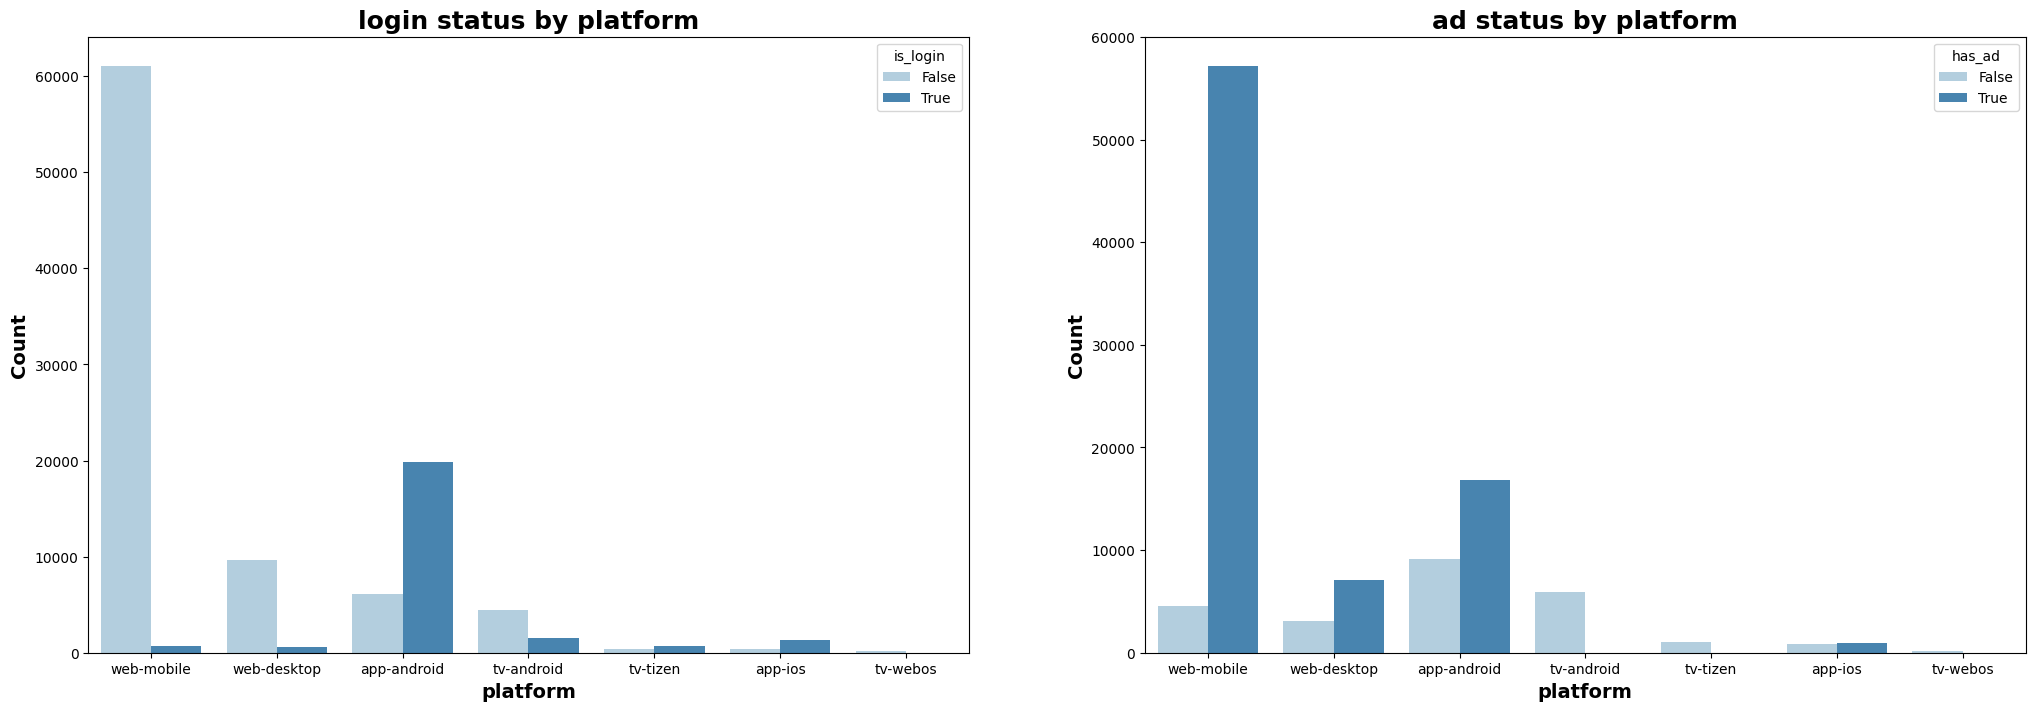

In [297]:
#Gender of Students by Test Preparation Course
# Group the DataFrame by 'gender' and 'test_preparation_course', and count the occurrences
gn = df.groupby('platform')['is_login'].value_counts()

# Set up the figure for plotting
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
# Create a count plot with seaborn, grouping by 'gender' and coloring by 'test_preparation_course'
sns.countplot(x='platform', hue='is_login', data=df, palette='Blues')
# Set the title of the plot
plt.title('login status by platform', fontdict={'size': 18, 'color': 'black', 'weight': 'bold'})
# Set labels for x-axis and y-axis
plt.xlabel('platform', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})
plt.ylabel('Count', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})


plt.subplot(1, 2, 2)
# Create a count plot with seaborn, grouping by 'gender' and coloring by 'test_preparation_course'
sns.countplot(x='platform', hue='has_ad', data=df, palette='Blues')
# Set the title of the plot
plt.title('ad status by platform', fontdict={'size': 18, 'color': 'black', 'weight': 'bold'})
# Set labels for x-axis and y-axis
plt.xlabel('platform', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})
plt.ylabel('Count', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})

# Display the plot
plt.show()

In [253]:
website_name_counts = df['website_name'].value_counts()
top_10_websites = website_name_counts.head(20)
top_10_websites = pd.DataFrame(top_10_websites)

In [254]:
#df2 = df[df['website_name'] == 'kapanlagi.com'
         #,'merdeka.com','vidio.com','liputan6.com','live index.',
         #'dream.co.id','none.','livestreaming watchpage.','google.com','home.'
         #]

In [255]:
df2 = df[df['website_name'].isin(['kapanlagi.com',
                                  'merdeka.com','vidio.com','liputan6.com','live index.','dream.co.id',
                                  'none.','livestreaming watchpage.','google.com','home.'
                                  ])]

In [258]:
cat = [feature for feature in df.columns if len(df[feature].unique())<500]

In [259]:
top_10_websites['platform'] = df['platform']



In [260]:
df['is_login']

0         False
1         False
2         False
3         False
4         False
          ...  
106806    False
106807    False
106808     True
106809    False
106810     True
Name: is_login, Length: 106811, dtype: bool

In [261]:
top_10_websites

,count,platform
website_name,,
kapanlagi.com,15146,NaN
vidio.com,11344,NaN
merdeka.com,11110,NaN
liputan6.com,10347,NaN
live index.,9322,NaN
dream.co.id,6526,NaN
none.,5761,NaN
home.,5592,NaN
livestreaming watchpage.,4437,NaN


In [262]:
df['website_name']

0                     liputan6.com
1                         bola.net
2                         bola.net
3                     liputan6.com
4                     liputan6.com
                    ...           
106806                 live index.
106807                liputan6.com
106808    livestreaming watchpage.
106809                    bola.com
106810              vod watchpage.
Name: website_name, Length: 106811, dtype: object

C:\Users\alexr\AppData\Local\Temp\ipykernel_58092\437794974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='website_name', data=top_10_websites, palette='viridis')


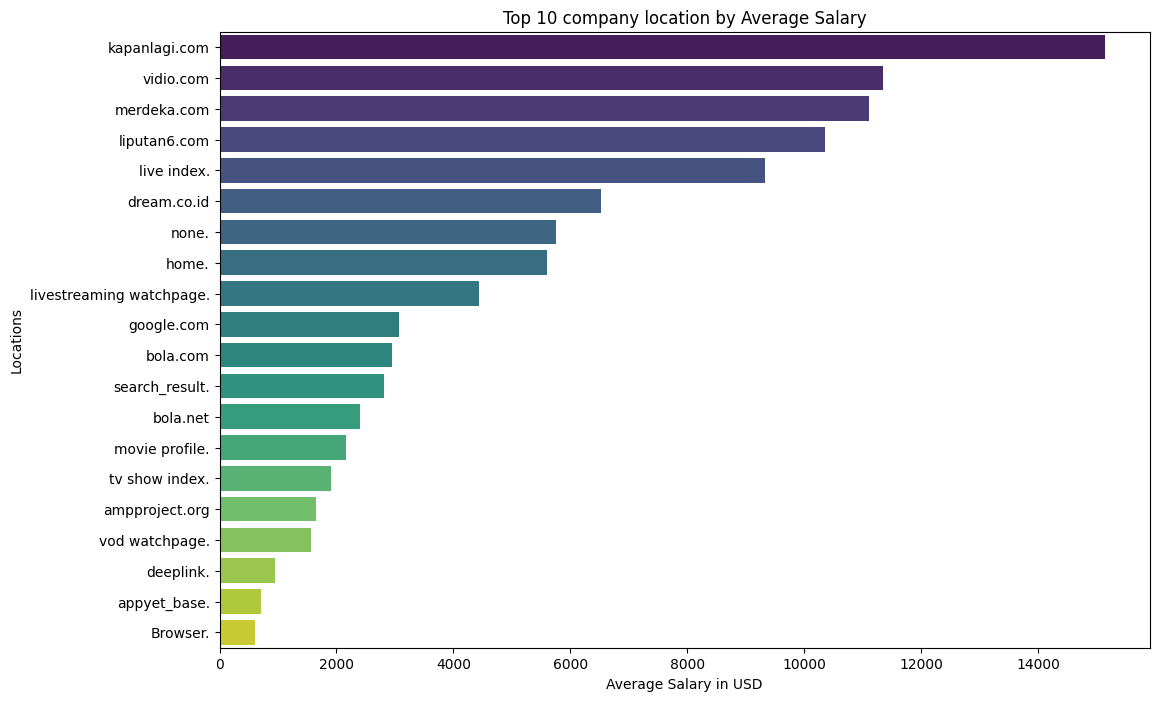

In [263]:
#average_salary_by_country = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
#top_10_countries = average_salary_by_country.head(10)
#top_10_countries = top_10_countries.reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='website_name', data=top_10_websites, palette='viridis')
plt.title('Top 10 company location by Average Salary')
plt.xlabel('Average Salary in USD')
plt.ylabel('Locations')
plt.show()

In [264]:
df['website_name']

0                     liputan6.com
1                         bola.net
2                         bola.net
3                     liputan6.com
4                     liputan6.com
                    ...           
106806                 live index.
106807                liputan6.com
106808    livestreaming watchpage.
106809                    bola.com
106810              vod watchpage.
Name: website_name, Length: 106811, dtype: object

In [265]:
gn = df.groupby('website_name')['is_login'].value_counts().sort_values(ascending=False)
gn.head(10)

website_name              is_login
kapanlagi.com             False       15122
merdeka.com               False       11075
vidio.com                 False       10583
liputan6.com              False       10287
live index.               True         7234
dream.co.id               False        6516
none.                     False        4733
livestreaming watchpage.  True         3529
google.com                False        3004
home.                     False        2985
Name: count, dtype: int64

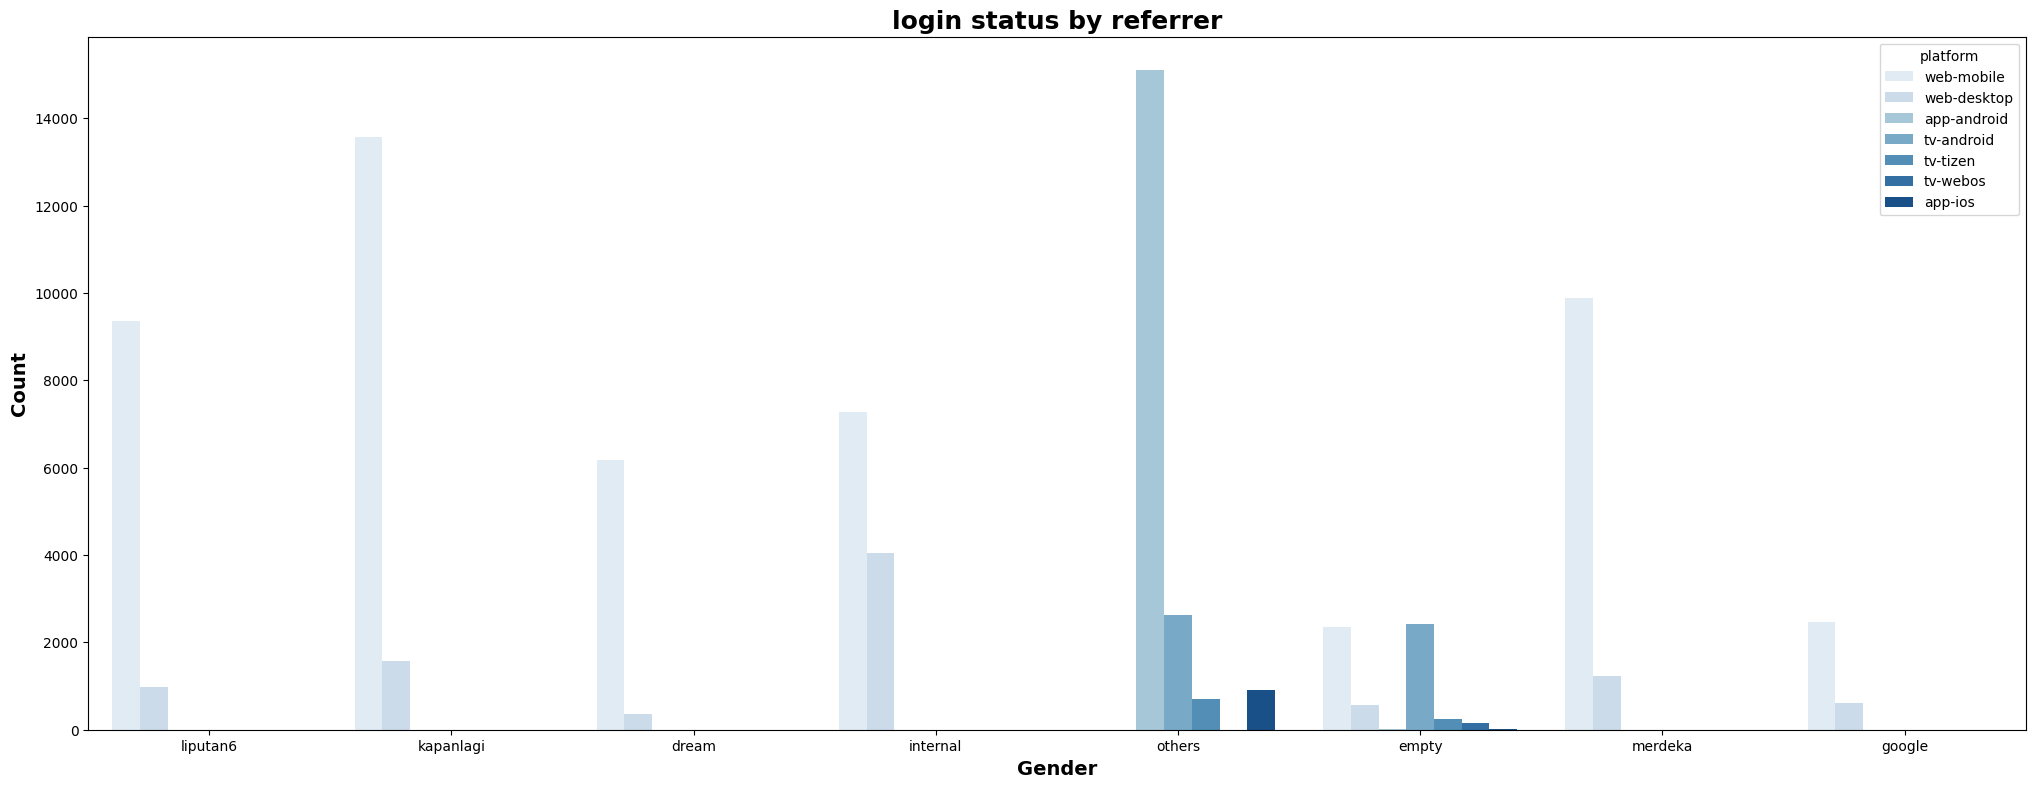

In [311]:
#Gender of Students by Test Preparation Course
# Group the DataFrame by 'gender' and 'test_preparation_course', and count the occurrences

# Set up the figure for plotting
plt.figure(figsize=(25, 9))

# Create a count plot with seaborn, grouping by 'gender' and coloring by 'test_preparation_course'
sns.countplot(x='referrer_group', hue='platform', data=df2, palette='Blues')

# Set the title of the plot
plt.title('login status by referrer', fontdict={'size': 18, 'color': 'black', 'weight': 'bold'})

# Set labels for x-axis and y-axis
plt.xlabel('Gender', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})
plt.ylabel('Count', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})

# Display the plot
plt.show()

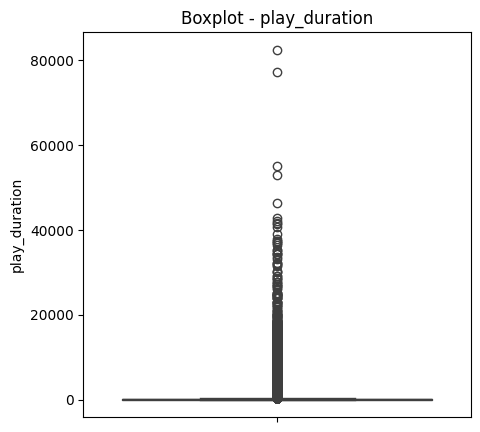

In [267]:
n1 = 'play_duration'

plt.figure(figsize = (5,5))

#Box plot
sns.boxplot(y = n1, data=df)
plt.title(f'Boxplot - {n1}')


#Show the plots
plt.show()

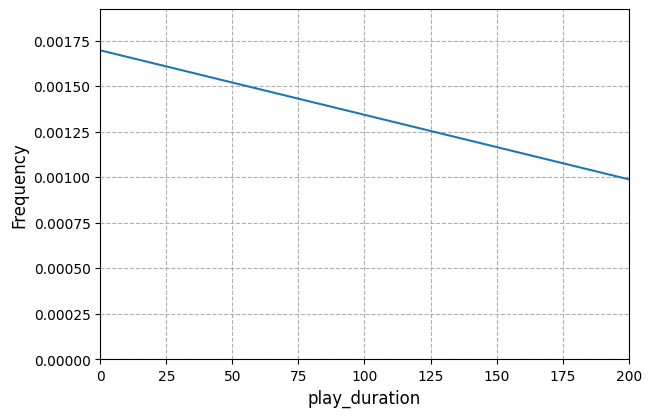

In [268]:
plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
sns.kdeplot(data = df['play_duration'])
plt.xlim([0,200])  
plt.xlabel("play_duration", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=1, linestyle="--")     
  
plt.show()

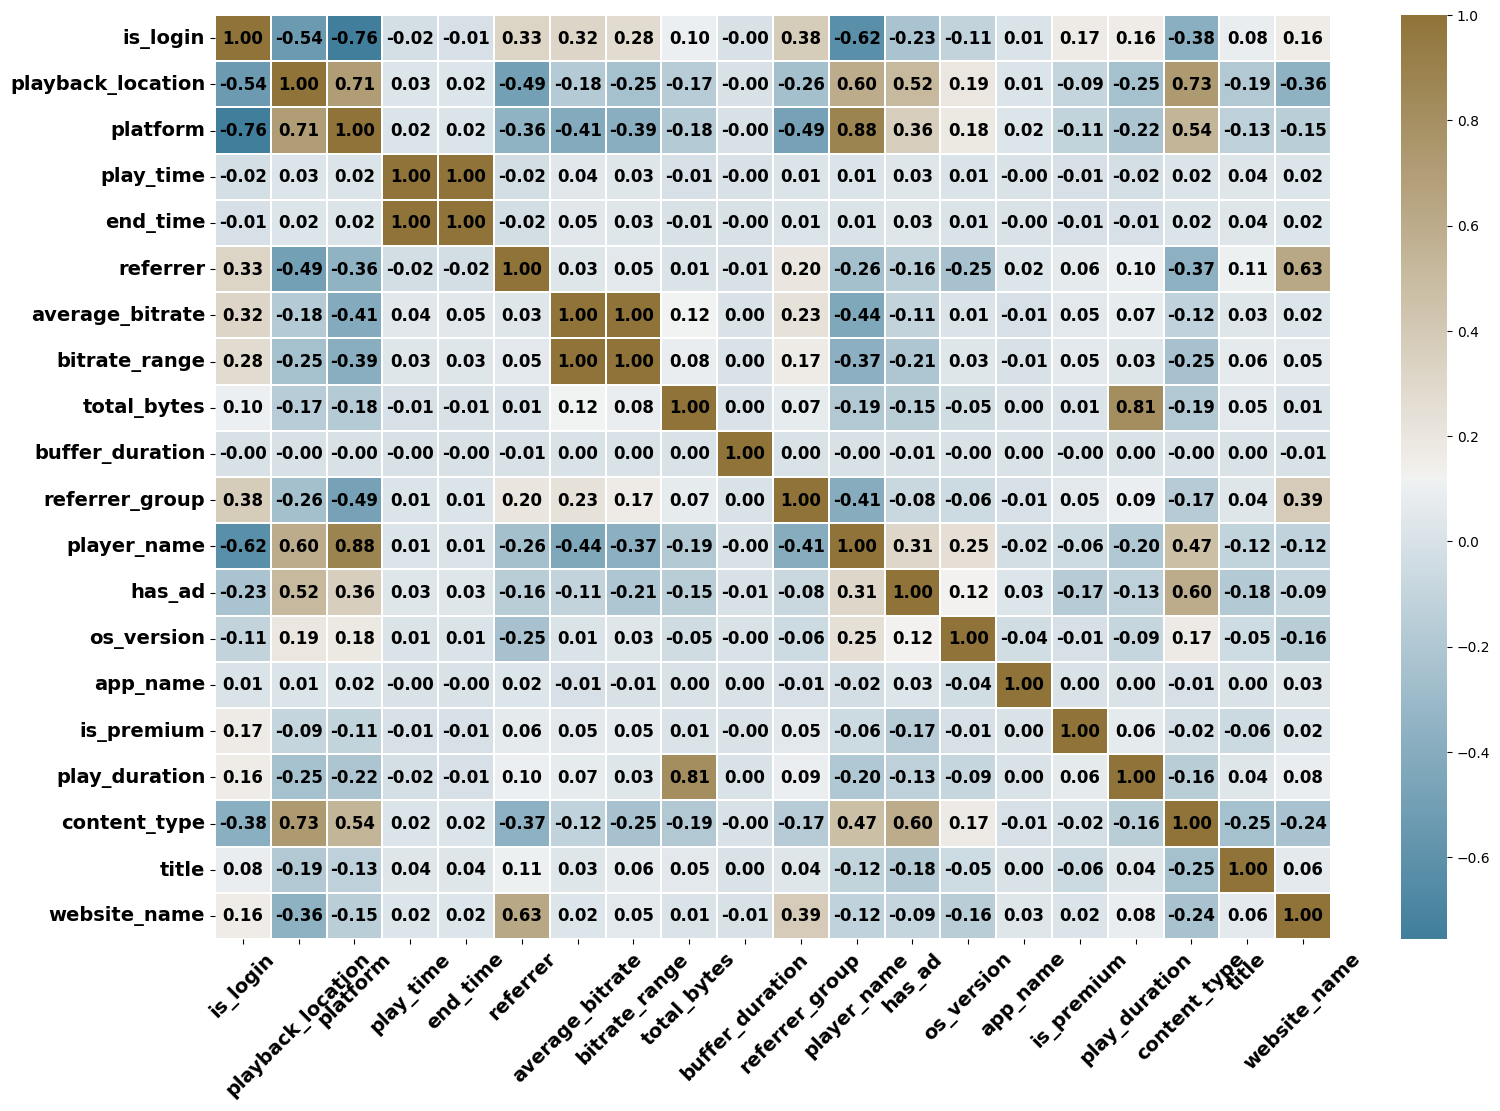

In [269]:
#Heatmap for correlation

# Initialize LabelEncoder object
label_encode = LabelEncoder()

# Create a copy of the DataFrame
df3 = df.copy()

# Iterate over columns in DataFrame
for i in df3.columns:
    # If column type is 'object', encode it using LabelEncoder
    if df3[i].dtype == 'object':
        df3[i] = LabelEncoder().fit_transform(df3[i])

# Plot correlation heatmap of modified DataFrame
plt.figure(figsize=(18, 12), facecolor='none')
sns.heatmap(
    df3.corr(),
    cmap=sns.diverging_palette(230, 60, as_cmap=True),
    annot=True,
    linewidths=0.2,
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
    fmt='.2f',
)
plt.xticks(fontsize=14, weight='bold', rotation=45)
plt.yticks(fontsize=14, weight='bold')
plt.show()